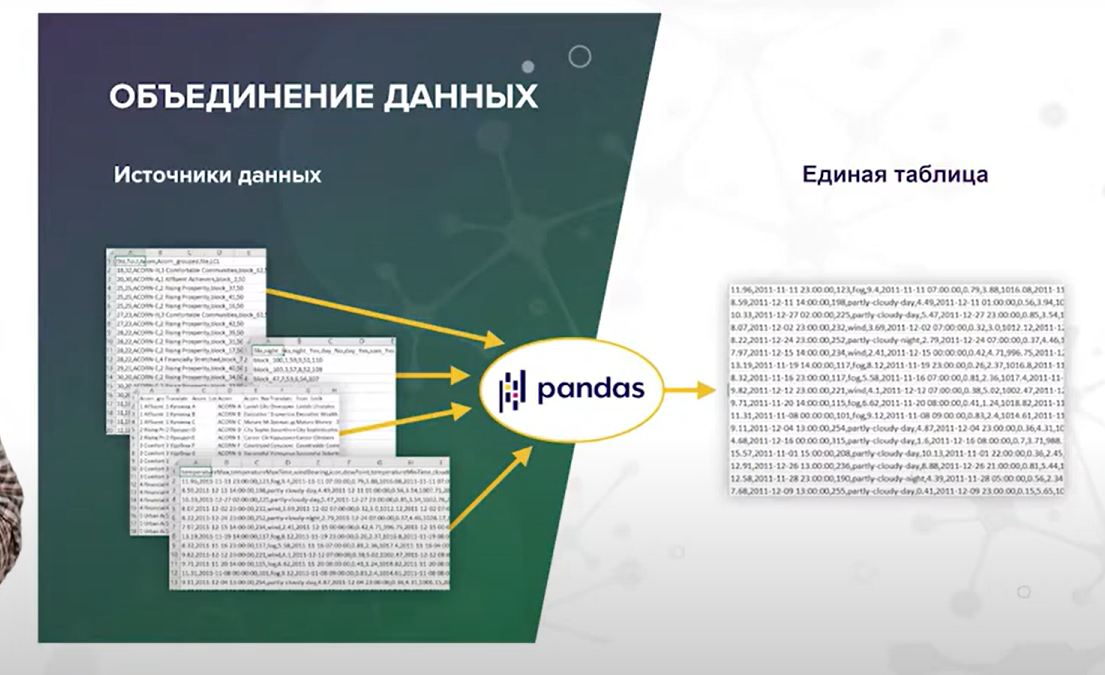

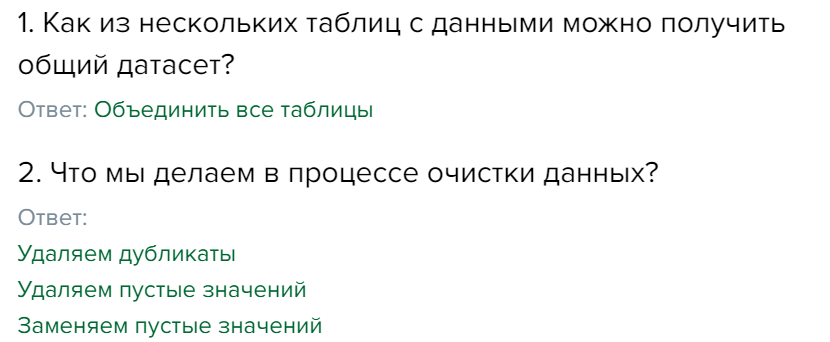

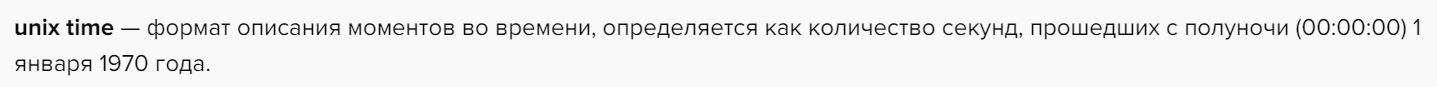

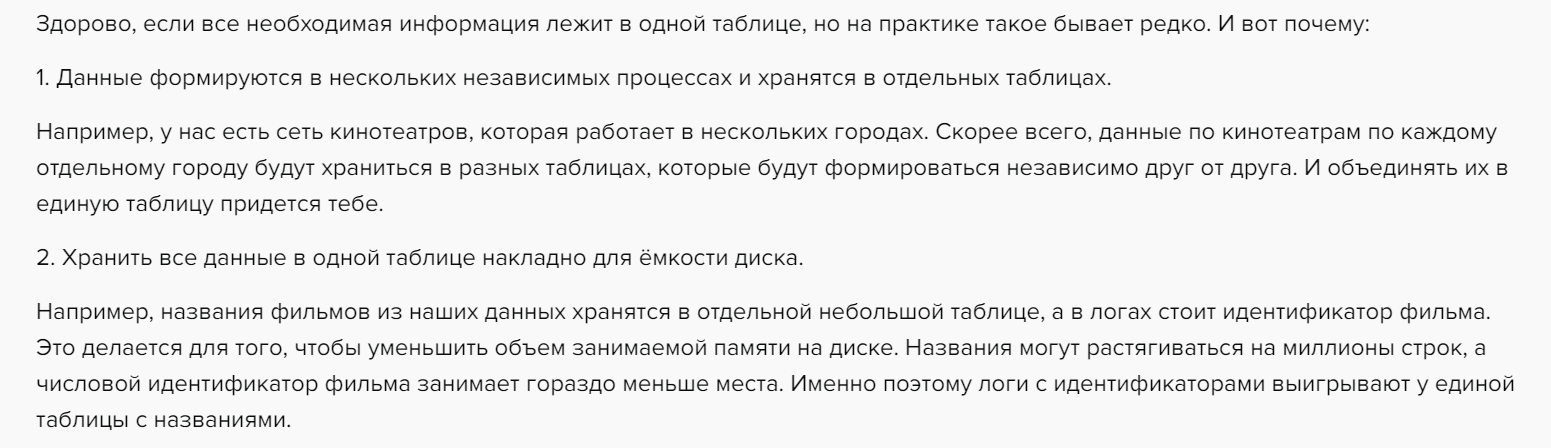

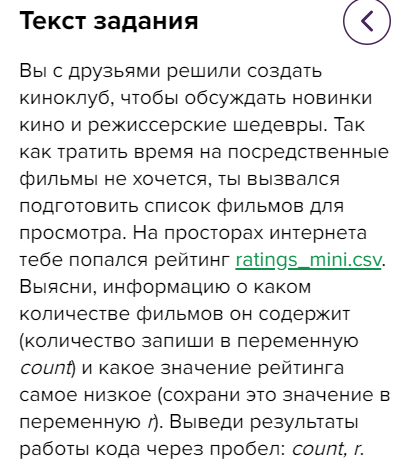

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
mini_ratings = pd.read_csv('ratings_mini.csv')

In [3]:
mini_ratings.head()

,userId,movieId,rating,timestamp
0,14,4,3.0,835441653
1,14,7,3.0,835441989
2,14,19,1.0,835441168
3,219,6,3.5,1198783144
4,219,10,4.5,1194932162


In [4]:
mini_ratings.shape[0]

96

In [5]:
# Но айдишников фильмов наверняка меньше
count = mini_ratings.movieId.nunique()
count

20

In [6]:
mini_ratings.movieId.duplicated().value_counts()

movieId
True     76
False    20
Name: count, dtype: int64

In [7]:
r = mini_ratings.rating.min()
r

0.5

# <span style="color: purple">Объединение таблиц

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# Все значения левой таблицы войдут
joined = ratings.merge(right=movies, how='left', on='movieId')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
# Проверим отсутствие дубликатов (Если True, значит их нет)
len(ratings) == len(joined)

True

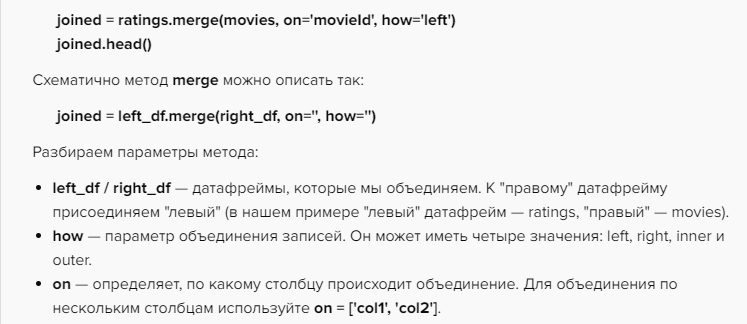

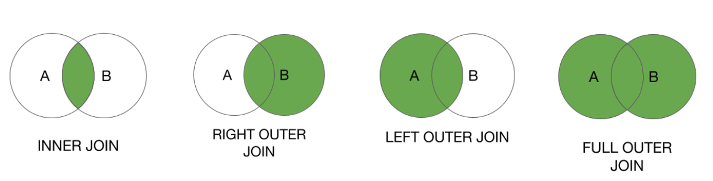

### Удаляем дубликаты
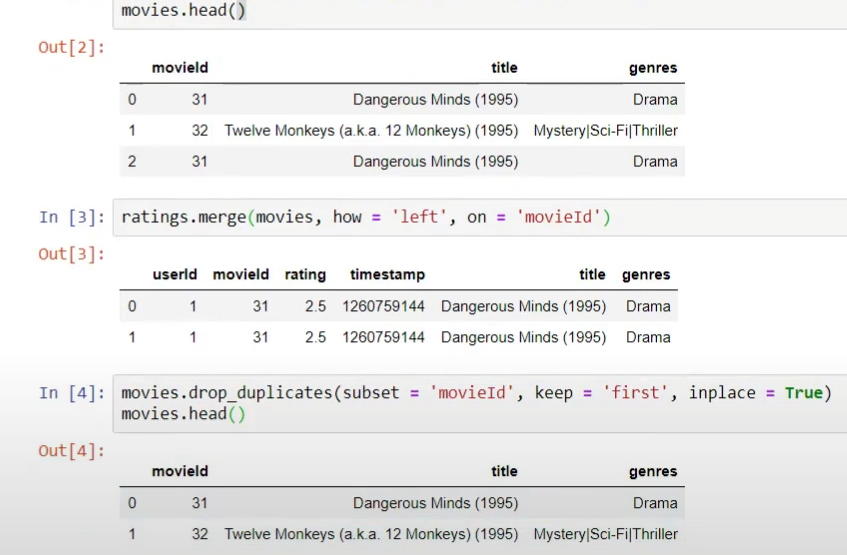

# <span style="color: purple">Предварительная обработка данных

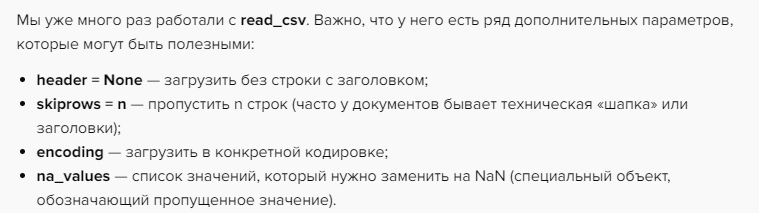

In [12]:
joined.query(expr='rating > 4').head()

,userId,movieId,rating,timestamp,title,genres
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [13]:
joined.query(expr='["Crime", "Action"] in genres').head(7)

,userId,movieId,rating,timestamp,title,genres
295,3,7899,4.5,1306464036,Master of the Flying Guillotine (Du bi quan wa...,Action
642,6,204,3.0,845553619,Under Siege 2: Dark Territory (1995),Action
666,6,251,3.0,845556257,"Hunted, The (1995)",Action
824,6,667,3.0,845555342,Bloodsport 2 (a.k.a. Bloodsport II: The Next K...,Action
1572,16,204,2.0,1377476617,Under Siege 2: Dark Territory (1995),Action
2260,18,160438,3.0,1473361651,Jason Bourne (2016),Action
2273,18,185135,4.5,1534007332,Sherlock - A Study in Pink (2010),Crime


In [14]:
# Фильмы, чьё название начинается с "Master"
joined.loc[joined.title.str.match(pat='Master')].head()

,userId,movieId,rating,timestamp,title,genres
295,3,7899,4.5,1306464036,Master of the Flying Guillotine (Du bi quan wa...,Action
4515,28,6947,3.5,1234515870,Master and Commander: The Far Side of the Worl...,Adventure|Drama|War
10286,66,6947,4.5,1099187936,Master and Commander: The Far Side of the Worl...,Adventure|Drama|War
13454,86,6947,3.5,1343944753,Master and Commander: The Far Side of the Worl...,Adventure|Drama|War
15034,95,6947,4.0,1071803718,Master and Commander: The Far Side of the Worl...,Adventure|Drama|War


In [15]:
# Фильмы, чьё название содержит "sex"
joined[joined.title.str.contains(pat='sex')]

,userId,movieId,rating,timestamp,title,genres
60787,391,5477,5.0,1030824589,Sex and Lucia (Lucía y el sexo) (2001),Drama|Romance
63965,414,5477,3.0,1100800073,Sex and Lucia (Lucía y el sexo) (2001),Drama|Romance
77640,483,5477,4.5,1415579315,Sex and Lucia (Lucía y el sexo) (2001),Drama|Romance
98079,606,5477,3.0,1174603944,Sex and Lucia (Lucía y el sexo) (2001),Drama|Romance


In [16]:
# Фильмы, чей жанр не относится к "Action"
joined[~joined.genres.str.contains(pat='Action')].head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance


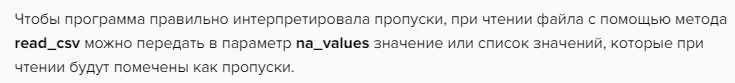

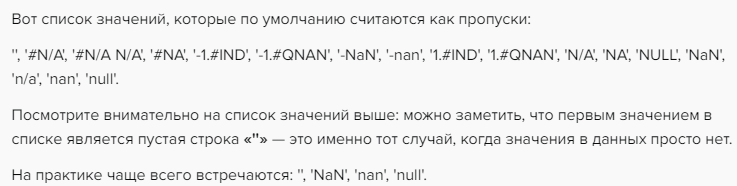

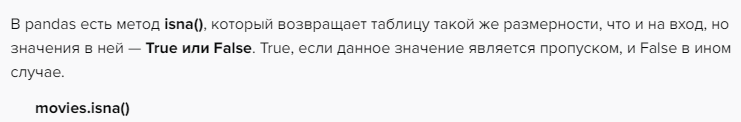

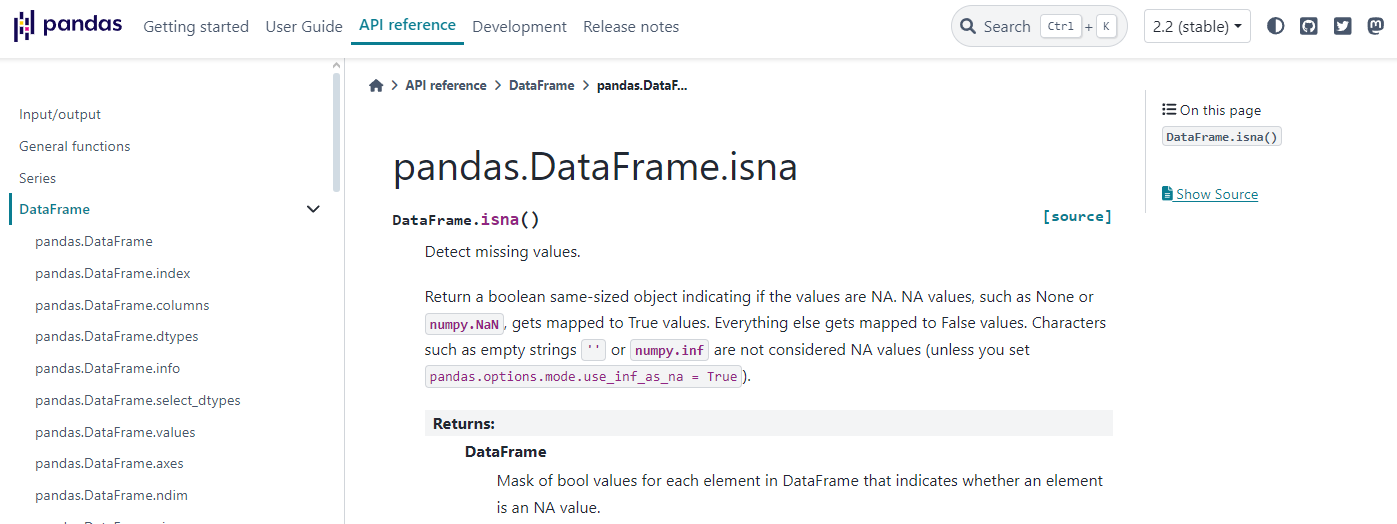

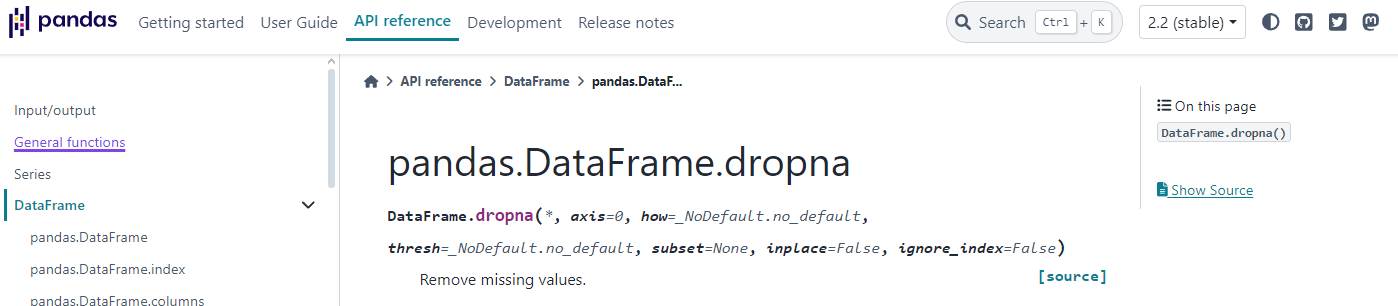

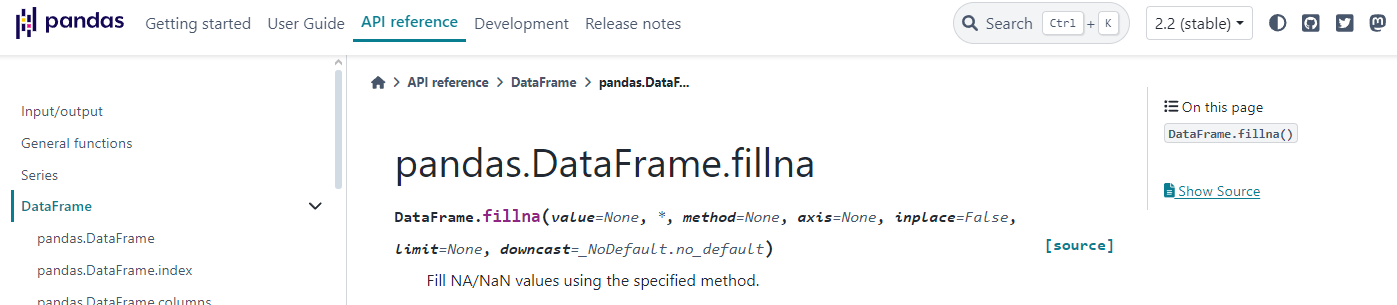

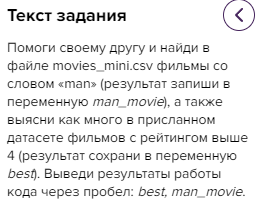

In [17]:
joined.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance


In [18]:
man_movie = joined.loc[joined.genres.str.contains(pat='man')]
print(man_movie.shape[0])
man_movie = man_movie.drop_duplicates(subset='title', keep='first')
print(man_movie.shape[0])

man_movie = man_movie.title.values.tolist()
man_movie[:10]

18124
1590


['Grumpier Old Men (1995)',
 'Bottle Rocket (1996)',
 'Rob Roy (1995)',
 'Desperado (1995)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Twister (1996)',
 "She's the One (1996)"]

In [19]:
best = joined.query('rating > 4.0')
best.head()

,userId,movieId,rating,timestamp,title,genres
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


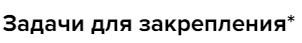

In [20]:
person_dict = { 
    'person_id': [417283, 849734, 132223, 573943, 19475, 3294095],  
    'person_name': ['Keanu Reeves', 'Jim Carrey', 'Johnny Depp', 'Keira Knightley', 'Natalie Portman', 'Marion Cotillard']
}
travel_log = { 
    'travel_id': [101, 102, 105, 121, 145, 161, 178], 
    'person_id': [573943, 132223, 849734, 417283, 382043, 3294095, 417283], 
    'country': ['Russia', 'Australia', 'Turkey', 'Japan', 'China', 'USA', 'Mexico'],
    'price': [5900, 15330, 10200, 12990, 9890, 13500, 7400], 
    'real_cost': [3500, 10280, 7600, 9850, 4340, 11200, 3300]
}

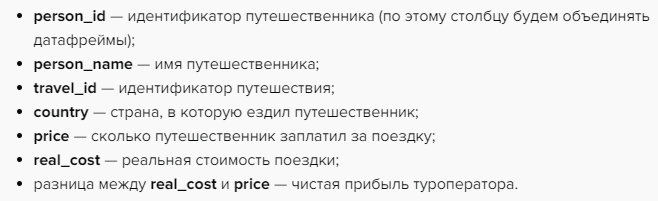

In [21]:
person = pd.DataFrame(person_dict)
travel = pd.DataFrame(travel_log)

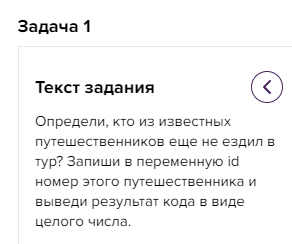

In [22]:
person.head(2)

,person_id,person_name
0,417283,Keanu Reeves
1,849734,Jim Carrey


In [23]:
travel.head(2)

,travel_id,person_id,country,price,real_cost
0,101,573943,Russia,5900,3500
1,102,132223,Australia,15330,10280


In [24]:
trip = person.merge(right=travel, how='left', on='person_id')
trip

,person_id,person_name,travel_id,country,price,real_cost
0,417283,Keanu Reeves,121.0,Japan,12990.0,9850.0
1,417283,Keanu Reeves,178.0,Mexico,7400.0,3300.0
2,849734,Jim Carrey,105.0,Turkey,10200.0,7600.0
3,132223,Johnny Depp,102.0,Australia,15330.0,10280.0
4,573943,Keira Knightley,101.0,Russia,5900.0,3500.0
5,19475,Natalie Portman,NaN,NaN,NaN,NaN
6,3294095,Marion Cotillard,161.0,USA,13500.0,11200.0


In [25]:
trip.person_name[trip.travel_id.isna()].iloc[0]

'Natalie Portman'

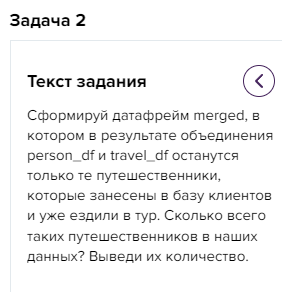

In [26]:
merged = person.merge(travel, how='right', on='person_id')
people = merged.person_name.dropna()
people.values

array(['Keira Knightley', 'Johnny Depp', 'Jim Carrey', 'Keanu Reeves',
       'Marion Cotillard', 'Keanu Reeves'], dtype=object)

In [27]:
people.nunique()

5

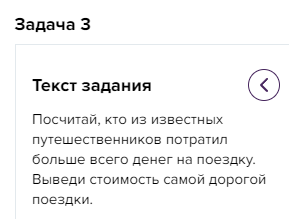

In [28]:
trip.head()

,person_id,person_name,travel_id,country,price,real_cost
0,417283,Keanu Reeves,121.0,Japan,12990.0,9850.0
1,417283,Keanu Reeves,178.0,Mexico,7400.0,3300.0
2,849734,Jim Carrey,105.0,Turkey,10200.0,7600.0
3,132223,Johnny Depp,102.0,Australia,15330.0,10280.0
4,573943,Keira Knightley,101.0,Russia,5900.0,3500.0


In [29]:
trip[trip.price == trip.price.max()].person_name.iloc[0]

'Johnny Depp'

In [30]:
most_spends = trip.groupby(by='person_name')['price'].sum()
most_spends

person_name
Jim Carrey          10200.0
Johnny Depp         15330.0
Keanu Reeves        20390.0
Keira Knightley      5900.0
Marion Cotillard    13500.0
Natalie Portman         0.0
Name: price, dtype: float64

In [31]:
most_spends[most_spends == most_spends.max()].index[0]

'Keanu Reeves'

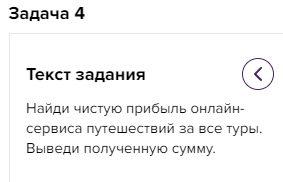

In [32]:
profit = merged['price'].sum() - merged['real_cost'].sum()
profit

25140